# Word Graph

In [16]:
pip install --upgrade pymupdf

In [17]:
%cd /content/drive/MyDrive/PPW

[Errno 2] No such file or directory: '/content/drive/MyDrive/PPW'
/content


In [18]:
import pymupdf

doc = pymupdf.open("main.pdf") # open a document
out = open("output.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

In [19]:
%%capture
!pip install nltk

In [20]:
import nltk
nltk.download('punkt')  # hanya perlu sekali
nltk.download('punkt_tab')  # opsional, untuk versi terbaru NLTK (≥3.8.2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
with open('output.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

Pembuatan Booklet Mitigasi Bencana Gempa Bumi dan Tsunami Sebagai Media Informasi bagi Masyarakat Kota
Padang - Diana Agusti, Elva Rahmah
113
PEMBUATAN BOOKLET MITIGASI BENCANA GEMPA BUMI DAN
TSUNAMI 


In [22]:
# Install: pip install nltk
import nltk


#text = "Ini adalah kalimat pertama. Ini kalimat kedua? Ya!"
sentences = nltk.sent_tokenize(teks)
print(sentences)
# Output: ['Ini adalah kalimat pertama.', 'Ini kalimat kedua?', 'Ya!']

['Pembuatan Booklet Mitigasi Bencana Gempa Bumi dan Tsunami Sebagai Media Informasi bagi Masyarakat Kota\nPadang - Diana Agusti, Elva Rahmah\n113\nPEMBUATAN BOOKLET MITIGASI BENCANA GEMPA BUMI DAN\nTSUNAMI SEBAGAI MEDIA INFORMASI BAGI MASYARAKAT\nKOTA PADANG\nDiana Agusti1, Elva Rahmah2\nProgram Studi Informasi Perpustakaan dan Kearsipan\nFBS Universitas Negeri Padang\nemail: dianaagusti17@gmail.com\nAbstract\nThis research was aimed to make booklet mitigation for an earthquake\nand tsunami disaster as information media of Padang Society.', 'This\npaper pupose to description creation phase booklet mitigation for an\nearthquake and tsunami disaster.', 'The research method used in this\npaper is a descriptive method.', 'Data resources was obtained from\ninterview, electronic media, and non electronic media.', 'For creating\nprocess booklet mitigation for an earthquake and tsunami disaster as\ninformation media, first step prepare tools and materials, tools and\nmaterials used in this mak

In [23]:
import pandas as pd
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0    Pembuatan Booklet Mitigasi Bencana Gempa Bumi ...
1    This\npaper pupose to description creation pha...
2    The research method used in this\npaper is a d...
3    Data resources was obtained from\ninterview, e...
4    For creating\nprocess booklet mitigation for a...
..                                                 ...
206                                        pdf\nYuldi.
207                                            (2008).
208                                  Mengenal Tsunami.
209                                 Jakarta Timur: CV.
210                                      Risky Aditya.

[211 rows x 1 columns]


In [24]:
df.to_csv('kalimat.csv', index=False, encoding='utf-8')

Untuk membuat word graph

Lanjutkan dengan menggunakan https://www.geeksforgeeks.org/nlp/co-occurence-matrix-in-nlp/

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import pandas as pd

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# ==== BACA FILE CSV ====
df = pd.read_csv("kalimat.csv")

# Ambil semua teks dalam satu string
text = " ".join(df.iloc[:,0].astype(str))

# Preprocess the text
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())
words = [word for word in words if word.isalnum() and word not in stop_words]

# Define the window size for co-occurrence
window_size = 2

# Create a list of co-occurring word pairs
co_occurrences = defaultdict(Counter)
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# Create a list of unique words
unique_words = list(set(words))

# Initialize the co-occurrence matrix
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the matrix
word_index = {word: idx for idx, word in enumerate(unique_words)}
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

# DataFrame output
co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)
co_matrix_df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cv,kesiapsiagaan,pernyataan,waktu,pertemuan,dipetik,penting,mengapa,title,lembaga,...,mahasiswa,diikuti,adapun,sebagian,electronic,meteor,meminimalisirkan,10,tinta,melalui
cv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kesiapsiagaan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pernyataan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
waktu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pertemuan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
meteor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
meminimalisirkan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tinta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
%%capture
pip install networkx

In [27]:
import networkx as nx
arr = co_matrix_df.to_numpy()
G=nx.from_numpy_array(arr)


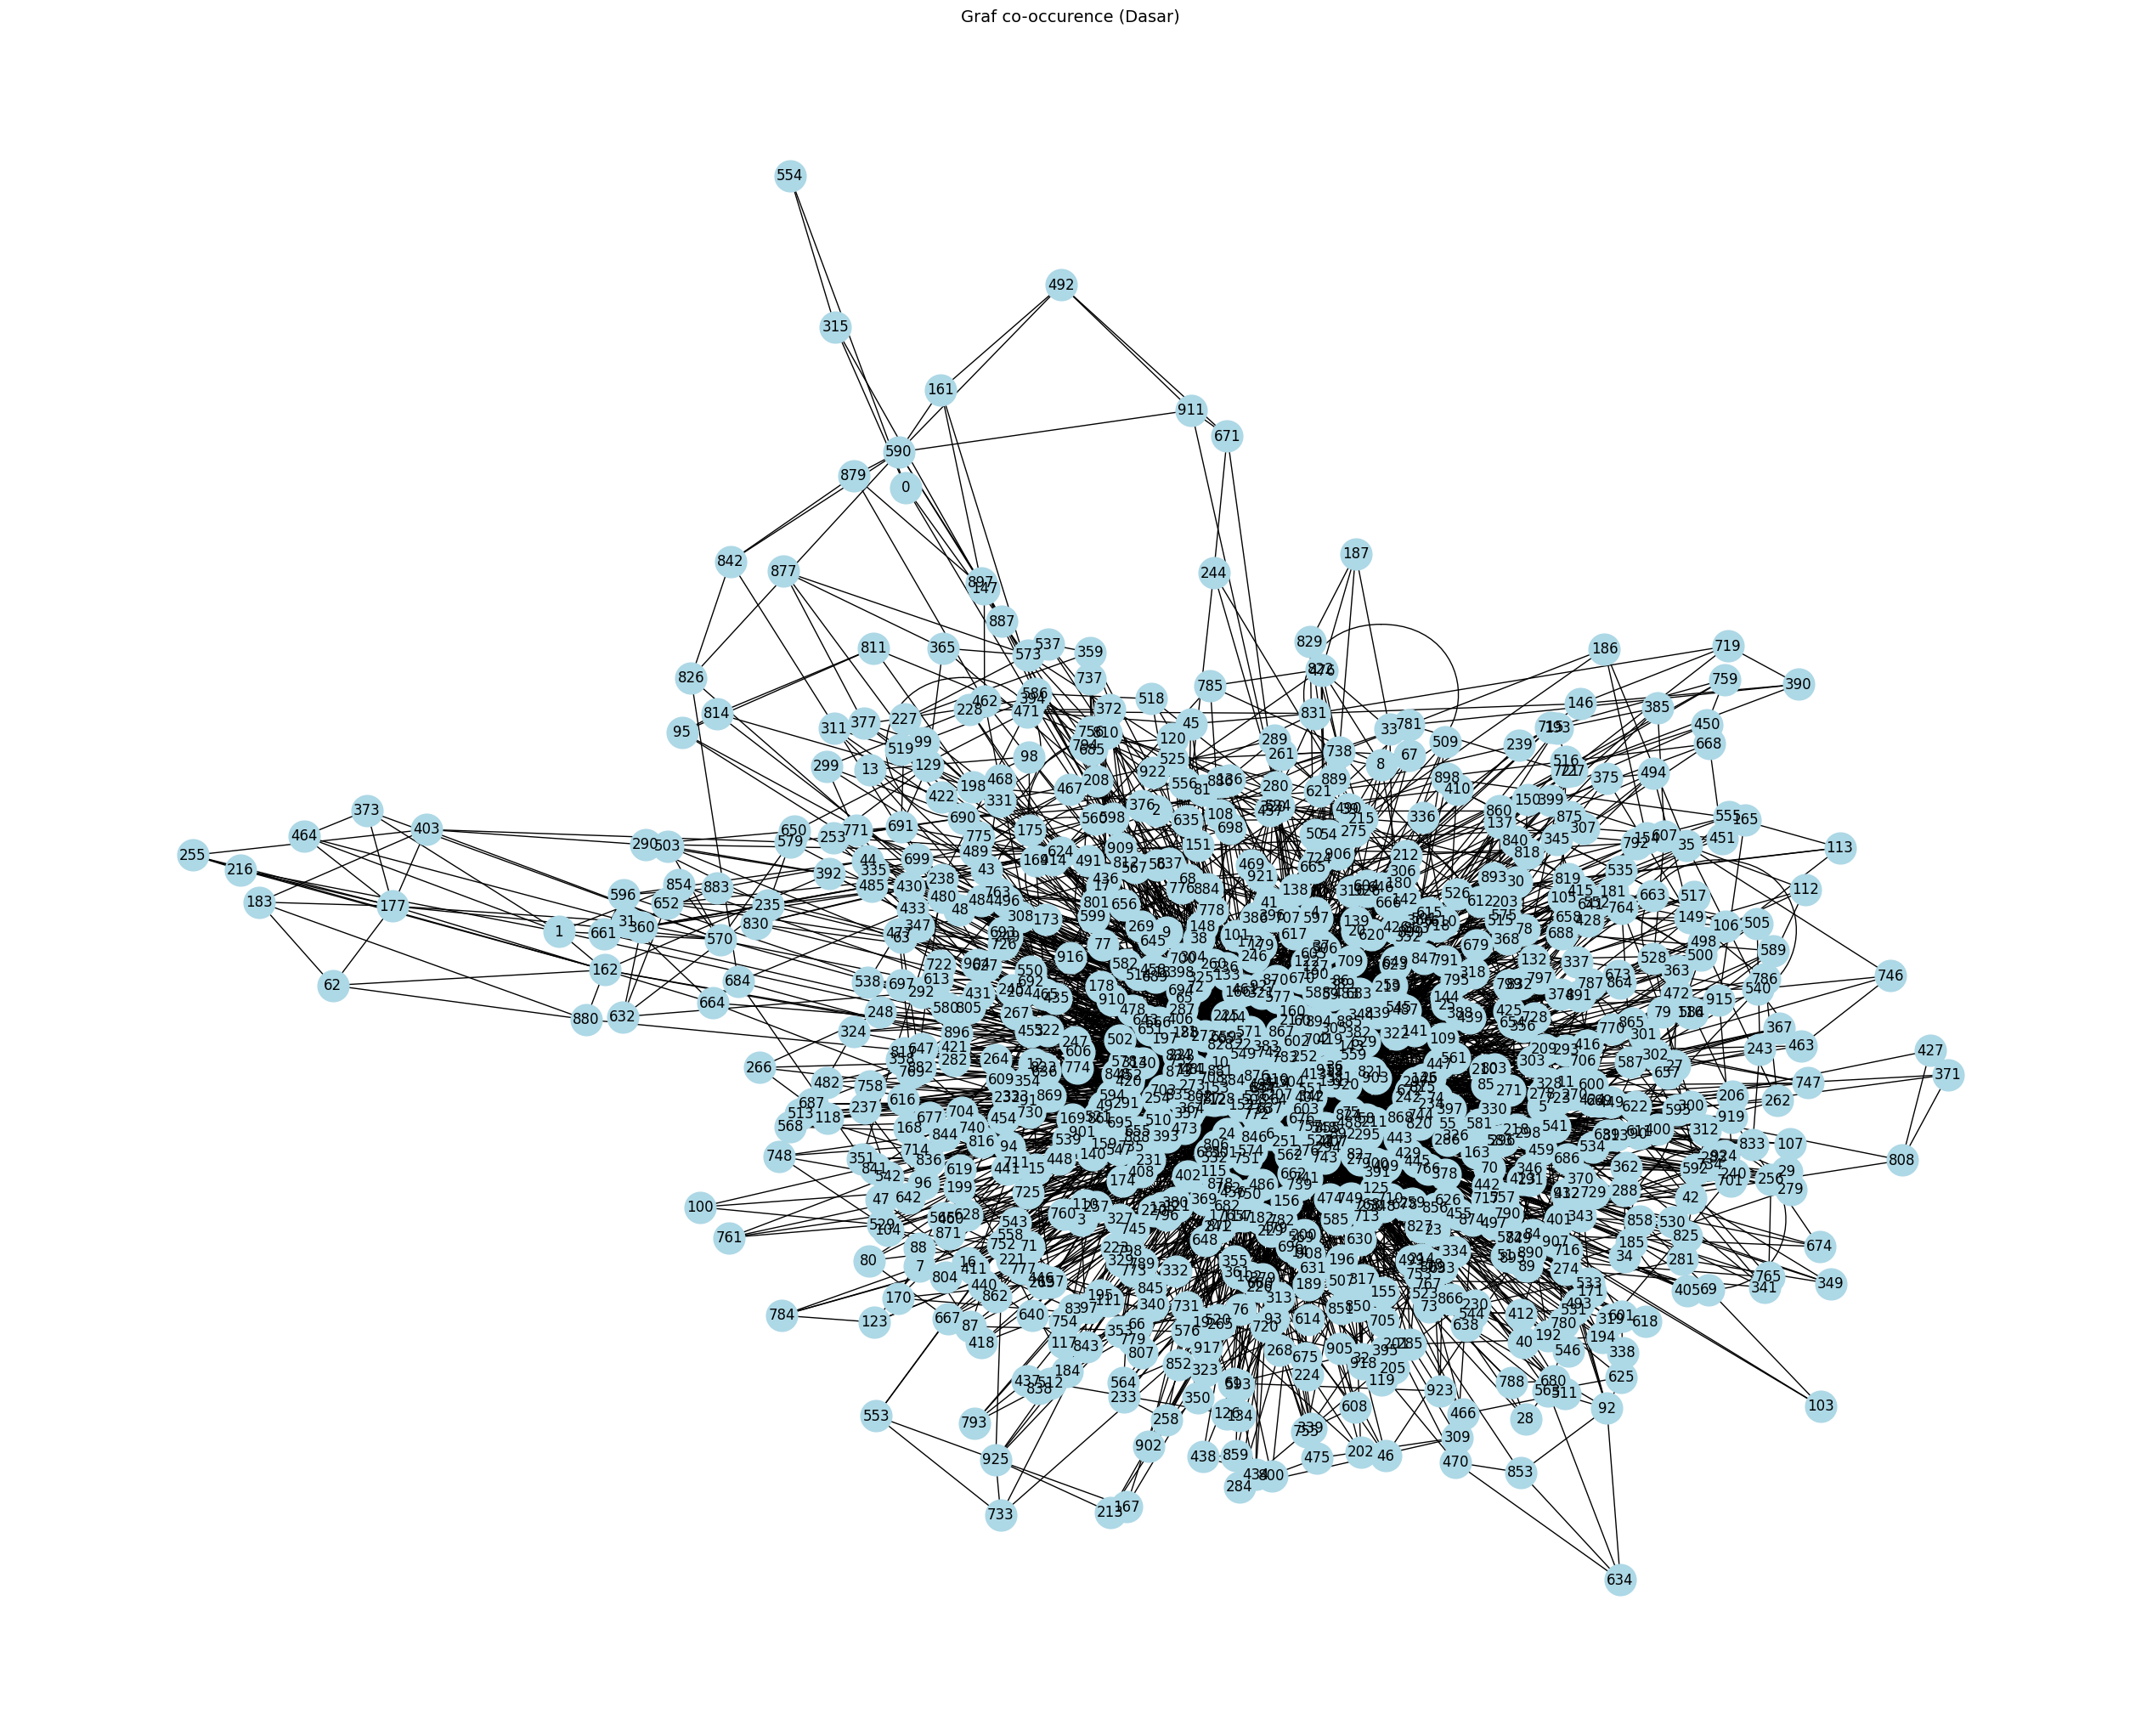

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 20))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=700, font_size=12)
plt.title("Graf co-occurence (Dasar)", fontsize=14)
plt.show()